IMPORTS

In [56]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt 


LOADING DATA

In [57]:
raw_mail_data = pd.read_csv('spam_ham_dataset.csv')

In [58]:
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)),'')

In [59]:

data = pd.read_csv('spam_ham_dataset.csv')  

X = data['text'].values
Y = data['label_num'].values


SPLIT DATA

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=3)

FEATURE EXTRACTION

In [61]:
# transform the text data to feature vectors that can be used as input to the Logistic regression

feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase= True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# convert Y_train and Y_test values as integers

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

TRAINING

In [62]:



model = LogisticRegression(penalty='l2', C=0.27,fit_intercept=True ,max_iter=100 ,solver='liblinear')

model.fit(X_train_features, Y_train)  



LogisticRegression(C=0.27, solver='liblinear')

ACCURACY ON TRAINING DATA (TEST SPLIT)

In [63]:
# prediction on test data

prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

In [64]:
print('Accuracy on test data : ', accuracy_on_test_data)

Accuracy on test data :  0.9768041237113402


CONFUSION MATRIX WITH DATASET 1 || 
This matrix detects the cases where the labels (results) were successful or not and what happened with each particular data

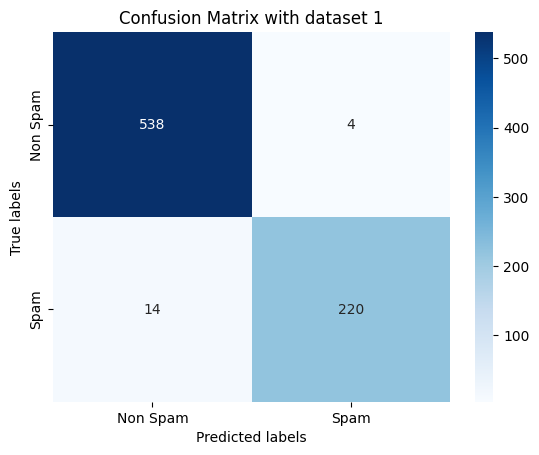

In [65]:

# Generar la matriz de confusión
conf_matrix = confusion_matrix(Y_test, prediction_on_test_data)

# Visualizar la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Spam', 'Spam'], yticklabels=['Non Spam', 'Spam'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix with dataset 1')
plt.show()


TESTING WITH A SECOND DATASET

In [66]:


# Load data
data = pd.read_csv('emails.csv')


X = data['text']
Y = data['spam']


X_features = feature_extraction.transform(X)
Prediction_dataset_2 = model.predict(X_features)
accuracy_on_dataset_2 = accuracy_score(Y, Prediction_dataset_2)


In [67]:
print('Accuracy on dataset 2 : ', accuracy_on_dataset_2)

Accuracy on dataset 2 :  0.9523393854748603


0.95 ACCURACY ON A SECOND DATASET!

CONFUSION MATRIX WITH A SECOND DATASET || This matrix detects the cases where the labels (results) were successful or not and what happened with each particular data

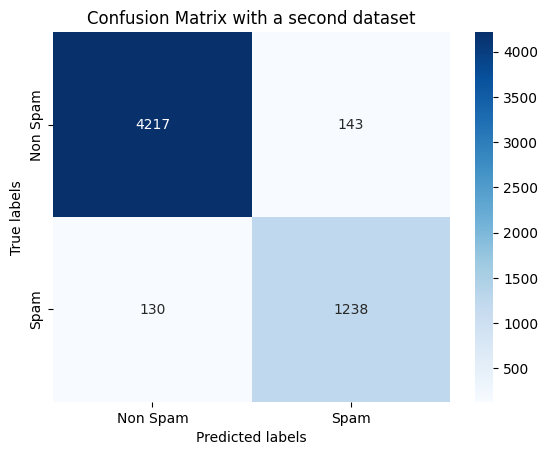

In [68]:


# Generar la matriz de confusión
conf_matrix = confusion_matrix(Y, Prediction_dataset_2)

# Visualizar la matriz de confusión
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Spam', 'Spam'], yticklabels=['Non Spam', 'Spam'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix with a second dataset')
plt.show()
